In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Read the data given
X = pd.read_csv('/content/data.csv', error_bad_lines = False, header = None, names = ['A','B'])
X

,A,B
0,-0.666176,1.124497
1,-0.575134,0.323926
2,-0.709830,0.449826
3,-0.424223,0.697510
4,-0.856591,0.327999
...,...,...
3995,2.128128,-0.222255
3996,-1.118196,0.343862
3997,1.664419,-0.359806
3998,0.466162,-0.525737


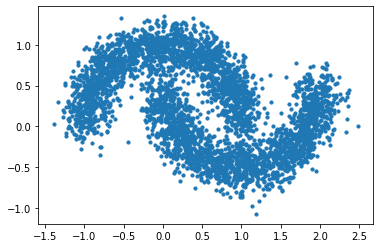

In [ ]:
# Plotting the data
colors = ["red", "yellow"]
colormap = mpl.colors.ListedColormap(colors)
plt.scatter(X.A, X.B, cmap = colormap, s=10)

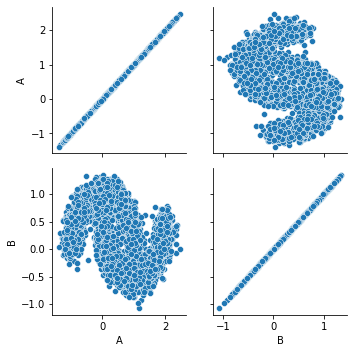

In [ ]:
# visualize the correlation of the given data
# identifying variables for further analysis
a = sns.PairGrid(X)
a.map(sns.scatterplot)

# K means

In [ ]:


from sklearn.cluster import KMeans
# Using elbow method we are determining the optimal cluster number
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i,
                  init = 'k-means++',
                  max_iter = 400,
                  n_init = 10,
                  random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

 where
 1. init = initialization method for     kmeans
 2. max_iter = Maximum number of iterations
 3. n_init = Choose how often the algorithm will rum with different centroid
 4. random_state = Choose random state for reproducibility



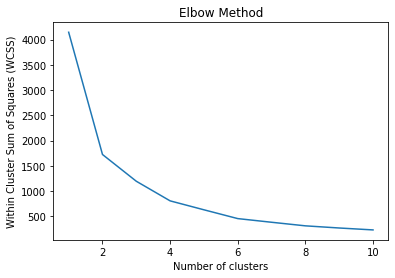

In [ ]:

# Showing the elbow plot
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')                              # set plot title
plt.xlabel('Number of clusters')                       # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')     # Set y axis name
plt.show()

In [ ]:


kmeans = KMeans(n_clusters = 2,            # Set amount of clusters
                init = 'k-means++',        # Initialization method for kmeans
                max_iter = 400,            # Maximum number of iterations
                n_init = 10,               # Choose how often algorithm will run with different centroid
                random_state = 0)          # Choose random state for reproducibility

NameError: ignored

In [ ]:


y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

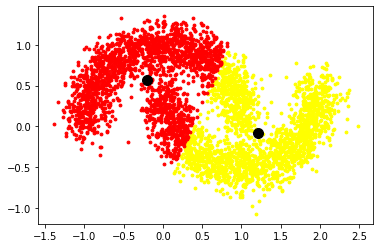

In [ ]:

# Plotting the clusters
X = np.array(X)
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=8, c='yellow', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=8, c='red', label ='Cluster 2')

# Plot the clusters centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s = 100,                       # S implies the set centroid size
            c = 'black')                   # c implies the set centroid color
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 1.20859078, -0.07835484],
       [-0.20436027,  0.57321344]])

In [ ]:
kmeans.predict([[0,0],[12,3]])

array([1, 0], dtype=int32)

# Gaussian Mixture Models

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

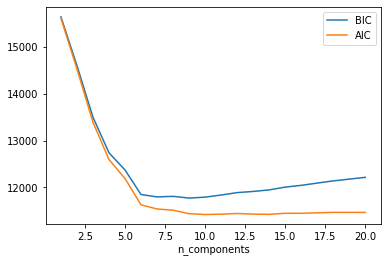

In [ ]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label = 'BIC')
plt.plot(n_components, [m.aic(X) for m in models], label = 'AIC')
plt.legend(loc = 'best')
plt.xlabel('n_components');

In [ ]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(X)

GaussianMixture(n_components=2)

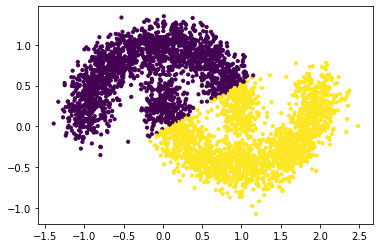

In [ ]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'viridis', s = 10)

# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

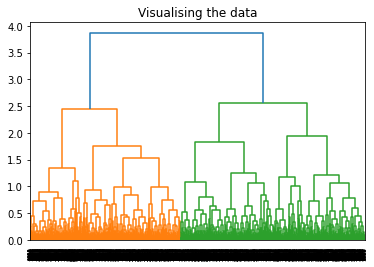

In [ ]:
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X,method = 'complete')))

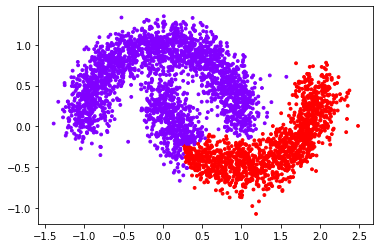

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2, affinity = 'manhattan', memory = None,
                              compute_full_tree='auto', linkage= 'average', distance_threshold=None, compute_distances=False)

# visualizing the clustering

plt.scatter(X[:, 0], X[:, 1], c = ac2.fit_predict(X), cmap = 'rainbow', s = 8)
plt.show()

# Spectural clustering

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
# Preprocessing the data to make it visualizable
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Normalizing the Data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters=2, eigen_solver=None, n_components=None,
                                         random_state=None, n_init=10, gamma=1.0, affinity='rbf',
                                         n_neighbors=100, eigen_tol=0.0, assign_labels='kmeans', degree=3,
                                         coef0=1, kernel_params=None, n_jobs=None, verbose=False)

# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)

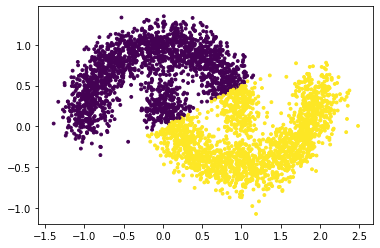

In [ ]:
# Building the label to colour mapping
#colours = {}
#colours[0] = 'b'
#colours[1] = 'y'
#colours[2] = 'g'
#colours[3] = 'r'

# Building the colour vector for each data point
#cvec = [colours[label] for label in labels_rbf]

# Plotting the clustered scatter plot

plt.scatter(X[:,0], X[:,1], c=labels_rbf, s=8)
#plt.legend(('Label 0', 'Label 1'))
plt.show()

# DBSCAN

Number of clusters: 2


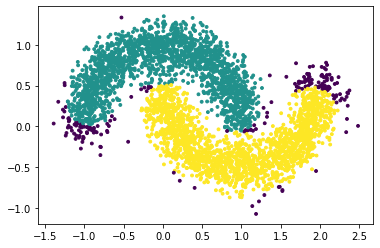

In [ ]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit_predict(X)
plt.scatter(X[:,0],X[:,1], c = y_pred, s = 8)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))


In [ ]:
import sys
np.set_printoptions(threshold = sys.maxsize)

In [ ]:
y_pred

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  1,  1,  1,  1,  0, -1,  1,  1,  0,  1,  0,  1,
        1,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,
        0,  0,  1, -1, -1,  0,  0,  1,  0,  0,  1, -1,  0,  1,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  0,  1,  1,  0,  1,  1,  1, -1,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1, -1,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  1, -1,  0,
        1,  0, -1,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0, -1,  1,  1,
        1,  0, -1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  1

In [ ]:
np.savetxt("/content/20074_Shashwat_Sourav_MlAssignment2_labels.csv", y_pred, fmt="%i")

In [ ]:
import sys
np.set_printoptions(threshold = sys.maxsize)

Number of clusters 2


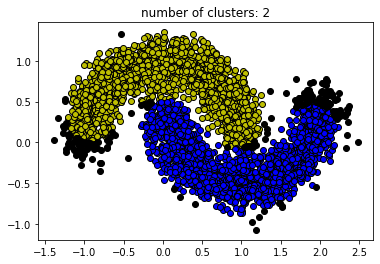

In [ ]:
# from sklearn.cluster import DBSCAN

# y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit(X)
# labels = y_pred.labels_
# core_samples_mask = np.zeros_like(y_pred.labels_, dtype=bool)
# core_samples_mask[y_pred.core_sample_indices_] = True

# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print('Number of clusters', n_clusters_)

# no_clusters = len(np.unique(labels))
# no_noise = np.sum(np.array(labels) == -1, axis=0)

# unique_labels = set(labels)
# colors = ['y', 'b', 'g', 'r']
# # print(colors)
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = 'k'

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k',
#              markersize=6)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
#              markeredgecolor='k',
#              markersize=6)

# plt.title('number of clusters: %d' % n_clusters_)
# plt.show()

# # print('Estimated no. of clusters: %d' % no_clusters)
# # print('Estimated no. of noise points: %d' % no_noise)

# # Generate scatter plot for training data

# # colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
# # plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
# # plt.title('Two clusters with data')
# # plt.xlabel('Axis X[0]')
# # plt.ylabel('Axis X[1]')
# # plt.show()

# # Remove the noise
# # range_max = len(X)
# # X = np.array([X.iloc[i] for i in range(0, range_max) if labels[i] != -1])
# # y_pred = np.array([[i] for i in range(0, range_max) if y_pred[i] != -1])

# # Generate scatter plot for training data
# # colors = list(map(lambda x: '#000000' if x == -1 else '#b40426', y_pred))
# # plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
# # plt.title(f'Noise removed')
# # plt.xlabel('Axis X[0]')
# # plt.ylabel('Axis X[1]')
# # plt.show()

# # # plt.scatter(X[:,0],X[:,1], c = y_pred, s = 8)
# # # print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))


Number of clusters 2
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1
 0 0

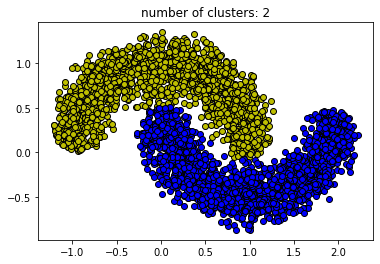

In [ ]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit(X)
labels = y_pred.labels_
core_samples_mask = np.zeros_like(y_pred.labels_, dtype=bool)
core_samples_mask[y_pred.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters', n_clusters_)

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
# print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        # col = 'k'
        continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]

    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
y_predicted = np.array([i for i in labels if i != -1])
print(y_predicted)
plt.title('number of clusters: %d' % n_clusters_)
plt.show()


# # plt.scatter(X[:,0],X[:,1], c = y_pred, s = 8)
# # print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
